In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("in1.csv", header=None)
data.columns = ["lat","long","DNS","DNC","HRS","HRC","RZ-12","DST","F10.7","TEC"]
#Sorting station
station = data['lat'].unique()
data_fs = data.loc[data['lat'] == station[0]]
#data cleaning
# data_fs = data_fs.loc[data['DNS'] != 0.30878]
data_fs = data_fs.drop(columns=['lat','long'])
# data_fy = data_fs['TEC'][:2000]

In [3]:
len(data_fs['TEC'])

27321

In [4]:
len(data_fs['TEC']) / (24*365)

3.118835616438356

In [5]:
log = []

for i in data_fs['F10.7'].unique():
    log.append(round(i))
    
res = []
for i in data_fs['F10.7'].unique():
    if i not in res:
        res.append(i)

In [6]:
data_fs['DNS'].nunique()

366

<AxesSubplot:>

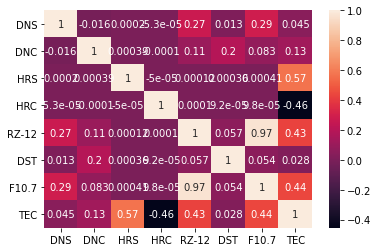

In [7]:
#Find the correlation of the feature of the data.
corr_val = data_fs.corr()
sns.heatmap(corr_val, annot=True)

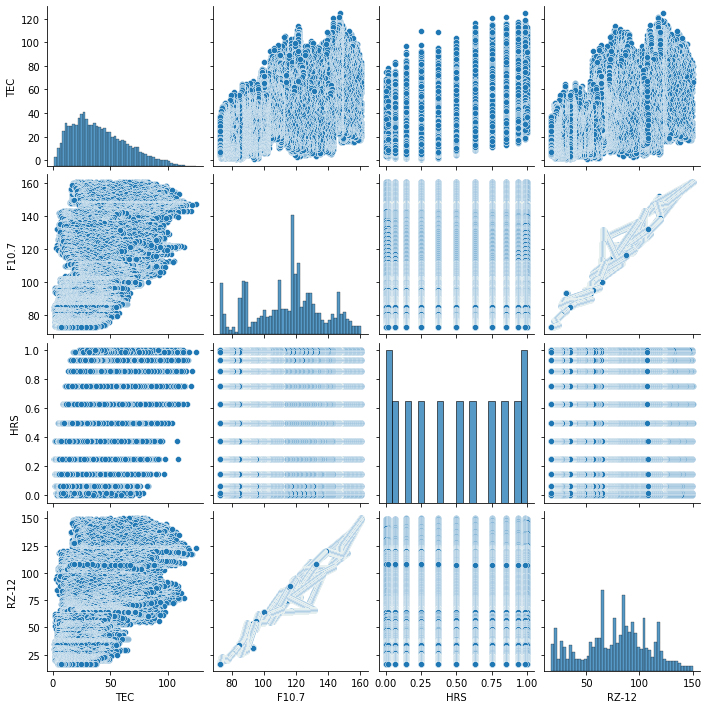

In [8]:
columns = ['TEC', 'F10.7', 'HRS', 'RZ-12']
sns.pairplot(data=data_fs[columns])

<AxesSubplot:>

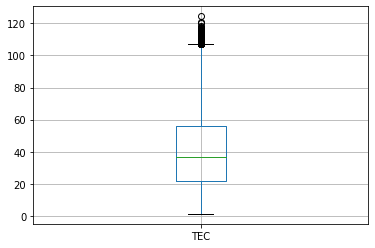

In [9]:
data_fs.boxplot('TEC')

In [10]:
data_fs.describe()

,DNS,DNC,HRS,HRC,RZ-12,DST,F10.7,TEC
count,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000
mean,0.503866,0.427192,0.499874,0.500033,77.983422,-9.810274,115.394595,40.481578
std,0.346966,0.352573,0.353574,0.353543,31.323485,5.812796,21.726803,23.706452
min,0.000007,0.000001,0.000000,0.000000,17.000000,-28.997000,72.700000,1.274300
25%,0.158200,0.086852,0.146450,0.146450,58.509000,-13.000000,99.821000,22.000000
50%,0.517150,0.344470,0.500000,0.500000,81.443000,-9.908200,117.540000,36.604000
75%,0.843370,0.779400,0.853550,0.853550,100.760000,-6.444000,129.120000,56.100000
max,0.999990,1.000000,1.000000,1.000000,149.990000,6.999800,160.600000,124.430000


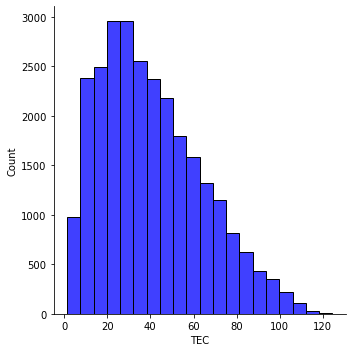

In [11]:
sns.displot(data_fs['TEC'], kde=False, bins=20, color='b')

In [12]:
#Calculating the outlier and eliminate it
q3 = data_fs['TEC'].quantile(.75)
q1 = data_fs['TEC'].quantile(.25)
iqr = q3-q1
print('Q1: {}' .format(q1))
print('Q3: {}' .format(q3))
print('IQR: {}' .format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print('Lower {:.2f} \nUpper: {:.2f}' .format(lower,upper))

Q1: 22.0
Q3: 56.1
IQR: 34.1
Lower -29.15 
Upper: 107.25


C:\Users\User\Anaconda3\envs\heart-cuda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEC'>

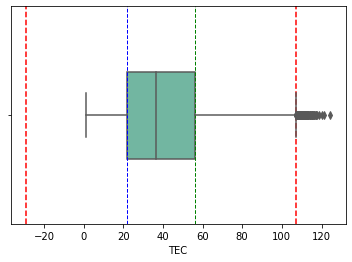

In [13]:
plt.axvline(x=q1, c='b', linestyle='--', linewidth = 1)
plt.axvline(x=q3, c='g', linestyle='--', linewidth = 1)
plt.axvline(x=lower, c='r', linestyle='--')
plt.axvline(x=upper, c='r', linestyle='--')
sns.boxplot(data_fs['TEC'], width=0.4, palette='Set2')

In [14]:
fil = data_fs['TEC'] > upper
data_fs[fil]

,DNS,DNC,HRS,HRC,RZ-12,DST,F10.7,TEC
1530,0.001616,0.45984,0.85355,0.146450,76.411,-13.6450,120.61,107.60
1531,0.001616,0.45984,0.75000,0.066987,76.414,-13.6580,120.62,107.42
1554,0.001000,0.46839,0.85355,0.146450,76.486,-13.9420,120.81,110.01
1578,0.000531,0.47696,0.85355,0.146450,76.560,-14.2390,121.01,114.00
1673,0.000127,0.51126,0.93301,0.250000,76.854,-15.4140,121.80,109.87
...,...,...,...,...,...,...,...,...
13769,0.995940,0.43638,0.93301,0.250000,117.930,-10.0690,142.54,108.69
13795,0.994770,0.42788,0.75000,0.066987,118.090,-9.9083,142.21,109.11
13796,0.994770,0.42788,0.62941,0.017037,118.100,-9.9021,142.20,108.92
13987,0.980250,0.36086,0.75000,0.066987,119.280,-8.7210,139.78,107.55


In [15]:
data_fs.drop(data_fs[fil].index, inplace=True)

In [16]:
data_fs.describe()

,DNS,DNC,HRS,HRC,RZ-12,DST,F10.7,TEC
count,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000
mean,0.502663,0.426413,0.498356,0.501061,77.833184,-9.811957,115.281148,40.195286
std,0.346394,0.352985,0.353382,0.353730,31.286607,5.821842,21.691215,23.320937
min,0.000007,0.000001,0.000000,0.000000,17.000000,-28.997000,72.700000,1.274300
25%,0.158200,0.086852,0.146450,0.146450,58.363500,-13.000000,99.735500,21.950500
50%,0.509650,0.342440,0.500000,0.500000,81.223000,-9.905200,117.510000,36.489000
75%,0.842590,0.779400,0.853550,0.853550,100.320000,-6.440100,128.990000,55.821500
max,0.999990,1.000000,1.000000,1.000000,149.990000,6.999800,160.600000,107.220000


In [17]:
from scipy.stats import zscore
zsc = zscore(data_fs['TEC'], ddof=0)

In [18]:
data_fs['zscore'] = zscore(data_fs['TEC'], ddof=0)

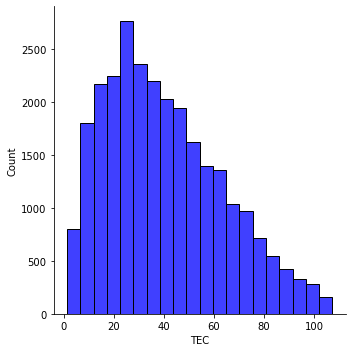

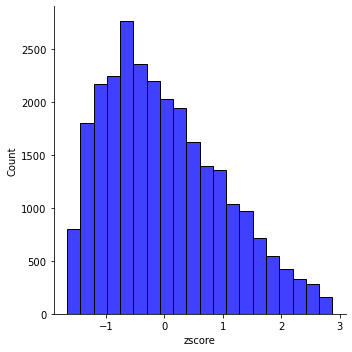

In [21]:
sns.displot(data_fs['TEC'], bins=20, color='b')
sns.displot(data_fs['zscore'], bins=20, color='b')
plt.show()